In [190]:
from parts import *
from stream import *
from exchanger_types import *
from exchanger_creator import *

# Design of an heat exchanger

## Selection of the geometry

First the technology of the heat exchanger has to be chosen. 

To do this, the component must first be designed. For this purpose, either the transferability can be defined directly or individual assemblies can be defined.


In [191]:
shell = SquareShellGeometry(5,2,1)
shell


shell geometry: SquareShellGeometry
	length:   5.000 m
	height:   1.000 m
	width:   2.000 m

In [192]:
pipe = StraightPipe(10e-3, 13e-3)
pipe.pipe_resistance_coefficient = 5e-2
pipe

part:
	 id = 2938285300432
	 typ: StraightPipe

geometric properties:
	diameter: in = 0.01000 m, out = 0.01300 m

hydraulic properties:
	flow area = 0.000079 m^2
	hydraulic diameter = 0.0100 m

thermic properties:

In [193]:
pipe_layout = PipeLayout(pipe,50)
pipe_layout

part:
	 id = 2938285264592
	 typ: PipeLayout

geometric properties:
	pipe type: StraightPipe
	diameter: in = 0.01000 m, out = 0.01300 m
	number of pipes: 50
	pipe pattern: square

hydraulic properties:
	flow area = 0.003927 m^2

thermic properties:

In [194]:
baffle = SegmentalBaffle(7, 50)
baffle

baffle: type = SegmentalBaffle
	number of baffles = 7
	baffle cut: 50 %

In [195]:
inlets = Inlets('ul','dl')

In [196]:
assembly = Assembly(shell,pipe_layout,tube_passes=2,baffle=baffle,inlets=inlets)
assembly.heat_transfer_coefficient = 445.4
assembly


Heat exchanger components:
shell geometry: SquareShellGeometry
	length:   5.000 m
	height:   1.000 m
	width:   2.000 m
PipeLayout:
	pipe type: StraightPipe
	length = 5.00000 m
	diameter: in = 0.01000 m, out = 0.01300 m
	number of pipes: 50
	pipe pattern: square

hydraulic properties:
	flow area coefficient:
		shell side: 0.003927 m^2
		tube side: 1.999867 m^2
	pressure coefficient:
		tube side: zeta = 25.000

thermic properties:
	heat transferability: 3999.969 W/K
	heat transfer area: 8.9806 m^2
	heat transfer coefficient: 445.40 W/(m^2 K)

Tube passes: number=2

Baffles:
baffle: type = SegmentalBaffle
	number of baffles = 7
	baffle cut: 50 %

flow orders:
	shell flow (flow 1): ul2d
	tube flow (flow 2): dl2r

### Selection of Flows

In [197]:
fluid_1 = Fluid("Water", pressure=101420, temperature=373.15)
fluid_1


Fluid: title = Water, id = 2938285273744
	p = 101420 Pa
	t = 100.0 °C

In [198]:
fluid_2 = Fluid("Water", temperature=293.15)
fluid_2

Fluid: title = Water, id = 2938336262480
	p = 101325 Pa
	t = 20.0 °C

In [199]:
flow_1 = Flow(fluid_1,mass_flow=0.85)
flow_1

Flow: id = 2938339604240
	mass flow = 0.85000 kg/s
	heat capacity flow: W_dot = 3583.32257 W/K
	heat flow: Q_dot = 0.00000 kW

Input Fluid:
	Fluid: title = Water, id = 2938285273744
	p = 101420 Pa
	t = 100.0 °C
Output Fluid:
	Fluid: title = Water, id = 2938337946896
	p = 101420 Pa
	t = 100.0 °C

In [200]:
flow_2 = Flow(fluid_2,volume_flow=831e-6)
flow_2

Flow: id = 2938335784976
	mass flow = 0.82951 kg/s
	heat capacity flow: W_dot = 3470.71268 W/K
	heat flow: Q_dot = 0.00000 kW

Input Fluid:
	Fluid: title = Water, id = 2938336262480
	p = 101325 Pa
	t = 20.0 °C
Output Fluid:
	Fluid: title = Water, id = 2938336052880
	p = 101325 Pa
	t = 20.0 °C

### Selection of Layout

In [201]:
exchanger_layout = ExchangerEqualCells((2,2),'CrossFlowOneRow',flow_1=flow_1,flow_order_1='dr2u',flow_2=flow_2, flow_order_2='ul2r',assembly=assembly)
exchanger_layout

Heat Exchanger Network:
	cell numbers: 4
	heat flows q_1=134.21 kW,	q_2=-134.22 kW
input flows: n=2
	flow 0: Water, temp= 100.00°C
	flow 1: Water, temp= 20.00°C
output flows: n=2
	flow 0: Water, temp= 62.87°C
	flow 1: Water, temp= 58.94°C

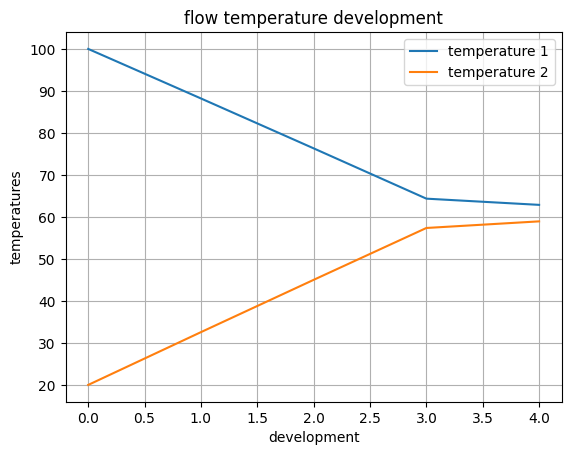

In [202]:
exchanger_layout.vis_flow_temperature_development()

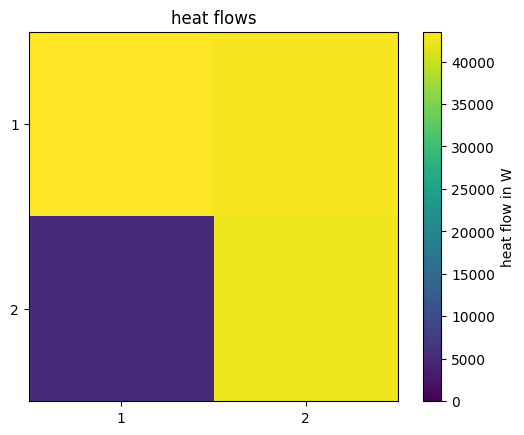

In [203]:
exchanger_layout.vis_heat_flow()

### Layout creator

In [204]:
exchanger_layout=auto_create_exchanger(flow_1,flow_2,assembly)
exchanger_layout

Heat Exchanger Network:
	cell numbers: 16
	heat flows q_1=136.98 kW,	q_2=-136.98 kW
input flows: n=2
	flow 0: Water, temp= 100.00°C
	flow 1: Water, temp= 20.00°C
output flows: n=2
	flow 0: Water, temp= 62.11°C
	flow 1: Water, temp= 59.75°C

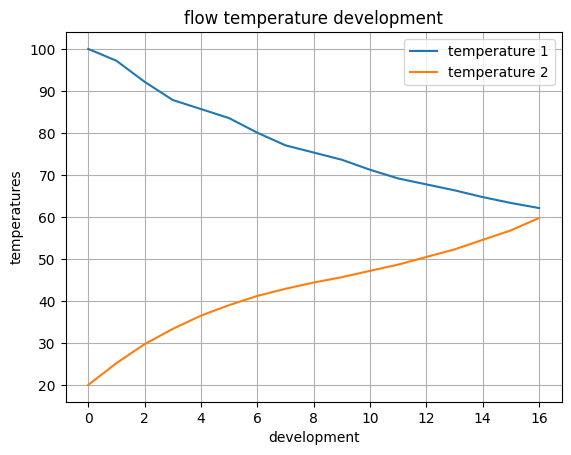

In [205]:
exchanger_layout.vis_flow_temperature_development()

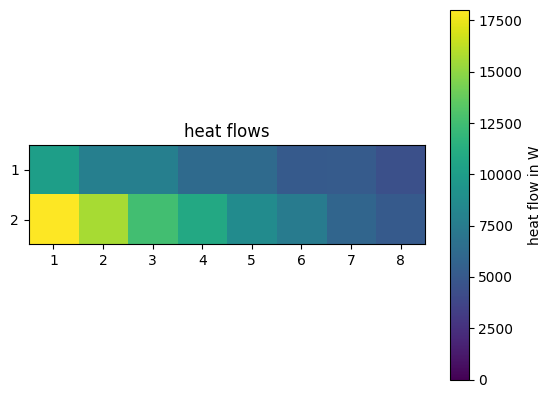

In [206]:
exchanger_layout.vis_heat_flow()